In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap
from matplotlib import cm

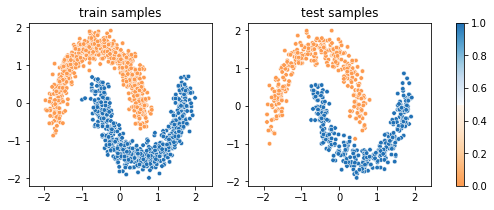

In [20]:
np.random.seed(123)
# np.random.seed(1998)

#生成样本
# X,y= datasets.make_circles(n_samples = 2000, factor=0.3, noise=.1)
X,y = datasets.make_moons(n_samples=2000, noise=.1)
# X,y = datasets.make_gaussian_quantiles(n_classes=2,n_samples=2000)

#划分训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#构建特征空间
c,r = np.mgrid[[slice(X.min()- .2,X.max() + .2,50j)]*2]
p = np.c_[c.flat,r.flat]

#归一化
ss = StandardScaler().fit(X)
X = ss.transform(X)
p = ss.transform(p)
X_test = ss.transform(X_test)

#可视化
fig = plt.figure(figsize = (9,3))
#自定义cmap
top = cm.get_cmap('Oranges_r', 512)
bottom = cm.get_cmap('Blues', 512)
newcolors = np.vstack((top(np.linspace(0.55, 1, 512)),
                       bottom(np.linspace(0, 0.75, 512))))
cm_bright = ListedColormap(newcolors, name='OrangeBlue')

plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax)
plt.show()

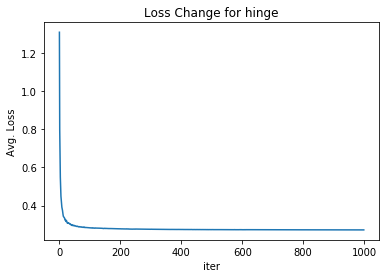

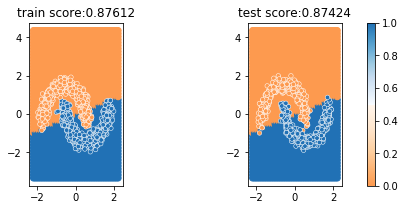

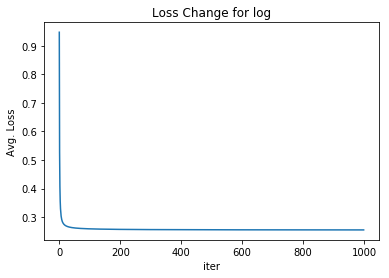

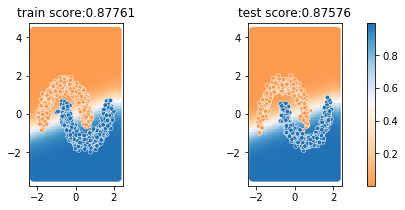

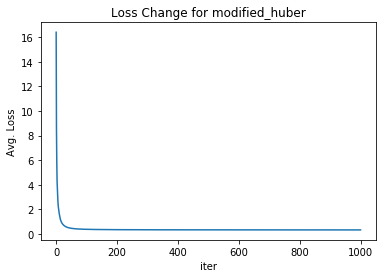

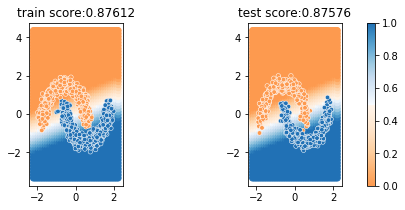

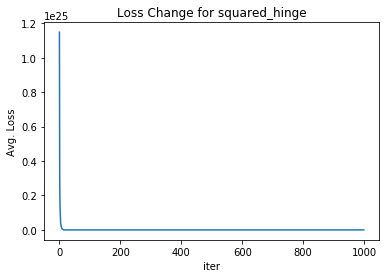

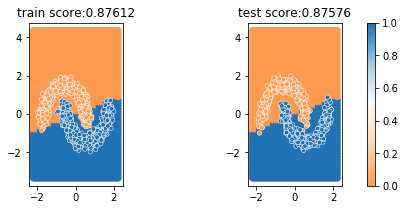

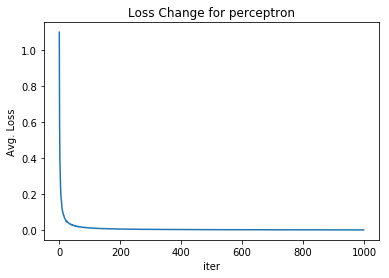

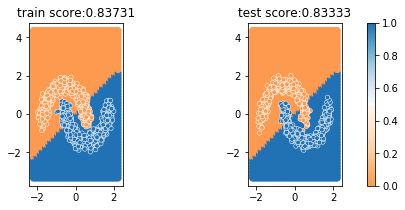

In [27]:
import sys
from io import StringIO

loss_type = ['hinge','log','modified_huber','squared_hinge','perceptron']
loss_func_loss = []
for loss in loss_type:
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    clf = SGDClassifier(loss=loss,max_iter=1000,verbose=1,shuffle=False,random_state=1012)
    clf.fit(X,y)
    fig,ax = plt.subplots(1)
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.append(float(line.split("loss: ")[-1]))
    print(len(loss_list))
    ax.plot(range(len(loss_list)),loss_list)
#     ax.set_ybound([0,20])
    ax.set_xlabel('iter')
    ax.set_ylabel('Avg. Loss')
    ax.set_title('Loss Change for %s'%(loss))
    loss_func_loss.append(loss_list)

    y_prd = clf.predict(X_test)
    if loss in ['log','modified_huber']:
        prob = clf.predict_proba(p)[:,1]
    else:
        prob = clf.predict(p)
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9, 3),subplot_kw = {'aspect':'equal'})
    ax1.scatter(*p.T,c = prob,cmap = cm_bright)
    ax1.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
    ax1.set_title('train score:%.5f'% clf.score(X,y))
    mp = ax2.scatter(*p.T,c = prob,cmap = cm_bright)
    ax2.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
    ax2.set_title('test score:%.5f'%clf.score(X_test,y_test))
    plt.colorbar(mp,ax = [ax1,ax2])

(0, 10)

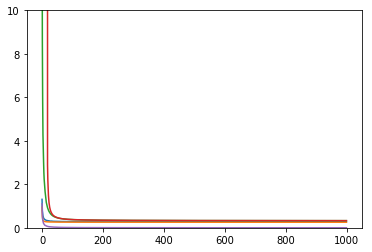

In [33]:
for i,l in enumerate(loss_func_loss):
    plt.plot(range(len(l)),l,label=loss_type[i])
plt.ylim(0,10)